In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classes.Learning_module_2d import LearningModule
import math


In [2]:

def model_error(vx_ls, vy_ls, alpha_ls, freq_ls):
    plot = True
    ex_gp_ls = []
    ey_gp_ls = []
    ex_lm_ls = []
    ey_lm_ls = []
    sigX_ls = []
    sigY_ls = []
    vx_gp_ls, vy_gp_ls, vx_lm_ls, vy_lm_ls = [],[],[],[]
    for i in range(1,len(vx_ls)-1):
        v_gp,v_lm, sig = GP.dyn_model(alpha_ls[i],freq_ls[i])
        vx_gp, vy_gp , vx_lm, vy_lm = v_gp[0][0], v_gp[1][0], v_lm[0], v_lm[1]
        vx_gp_ls.append(vx_gp)
        vy_gp_ls.append(vy_gp)
        vx_lm_ls.append(vx_lm)
        vy_lm_ls.append(vy_lm)
        sigX_ls.append(sig[0])
        sigY_ls.append(sig[1])
        vx = vx_ls[i]
        vy = vy_ls[i]


        ex_gp = np.abs(vx-vx_gp)
        ey_gp = np.abs(vy-vy_gp)
        ex_lm = np.abs(vx-vx_lm)
        ey_lm = np.abs(vy-vy_lm)
        ex_gp_ls.append(ex_gp)
        ey_gp_ls.append(ey_gp)
        ex_lm_ls.append(ex_lm)
        ey_lm_ls.append(ey_lm)
    
    if plot:
        time = range(len(vx_gp_ls))
        fig, ax = plt.subplots(2, figsize=(10, 8))
        ax[0].fill_between(time,   (np.array(vx_gp_ls)+2*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)-2*np.array(sigX_ls).flatten() ).flatten(), color = 'gray', alpha = 0.5, label= '2sigma bound')
        ax[0].fill_between(time,   (np.array(vx_gp_ls)+3*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)+2*np.array(sigX_ls).flatten() ).flatten(), color = 'black', alpha = 0.5)
        ax[0].fill_between(time,   (np.array(vx_gp_ls)-2*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)-3*np.array(sigX_ls).flatten() ).flatten(), color = 'black', alpha = 0.5,label= '3sigma bound')

        ax[0].plot(vx_lm_ls, color = 'red', label = 'linear Model')
        ax[0].plot(vx_ls, color = 'green', label ='Actual Data')
        ax[0].plot(vx_gp_ls, color = 'blue', label = 'GP')
        ax[0].set_title('Velocity X')
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Velocity X')
        ax[0].legend()
        


        ax[1].fill_between(time,   (np.array(vy_gp_ls)+2*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)-2*np.array(sigY_ls).flatten() ).flatten(), color = 'gray', alpha = 0.5)
        ax[1].fill_between(time,   (np.array(vy_gp_ls)+3*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)+2*np.array(sigY_ls).flatten() ).flatten(), color = 'black', alpha = 0.5)
        ax[1].fill_between(time,   (np.array(vy_gp_ls)-2*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)-3*np.array(sigY_ls).flatten() ).flatten(), color = 'black', alpha = 0.5,label= '3sigma bound')

        ax[1].plot(vy_lm_ls, color = 'red', label = 'linear Model')
        ax[1].plot(vy_ls, color = 'green', label ='Actual Data')
        ax[1].plot(vy_gp_ls, color = 'blue', label = 'GP')
        ax[1].set_title('Velocity Y')
        ax[1].set_xlabel('Time')
        ax[1].set_ylabel('Velocity Y')
        # ax[1].legend()
                

        plt.show()
    else:
        return np.array(vx_gp_ls), np.array(vy_gp_ls), np.array(vx_lm_ls), np.array(vy_lm_ls), sigX_ls, sigY_ls


In [3]:

GP = LearningModule(3)
objective=10
dataset2 = np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP2.npy')

dataset1 =  np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP.npy')
GP.read_data_action(dataset1, objective)
GP.read_data_action2(dataset2,objective)


all_dataset_shape= (1190,)


In [39]:
# GP.estimate_a0(0)
GP.load_GP('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\only_open_loop')

GP is loaded


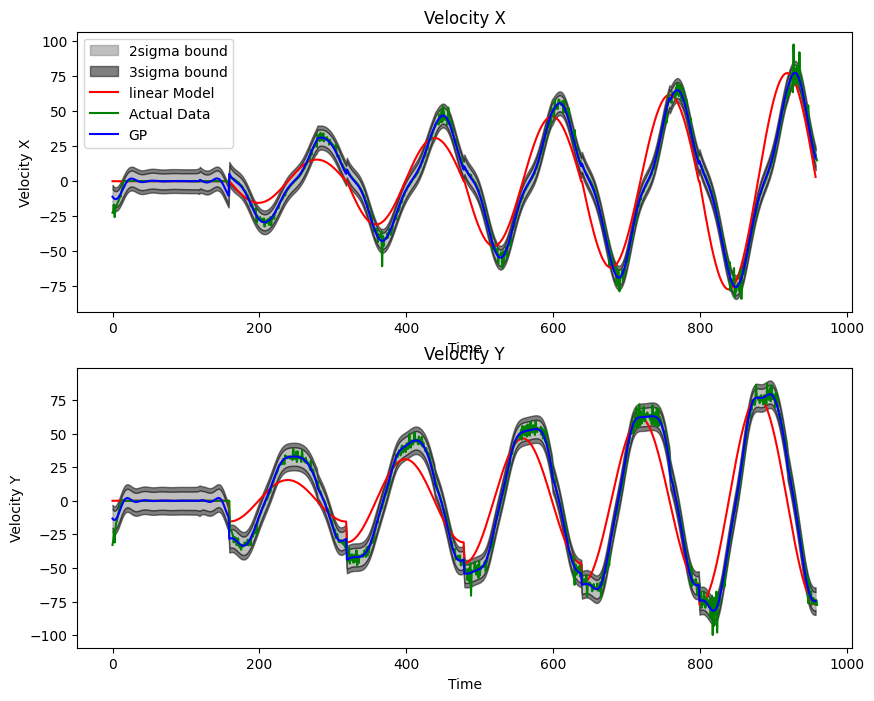

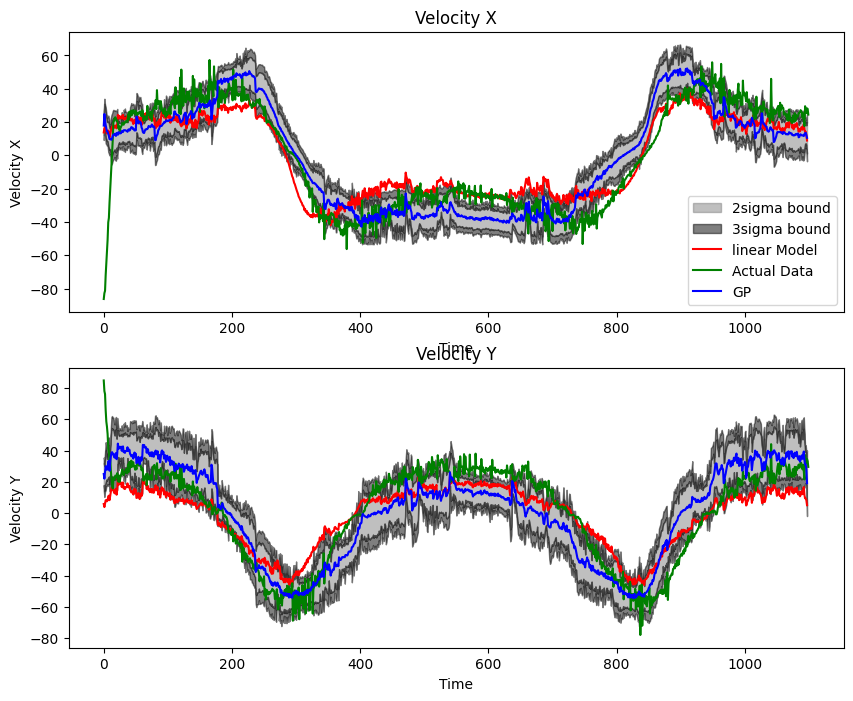

In [40]:
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.normalize_angle(GP.alpha_infinity.flatten()), GP.freq_infinity.flatten())

In [43]:
# GP.estimate_a0(3)
GP.load_GP('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\grouped')

GP is loaded


In [24]:
# GP.estimate_a0(1)
###Using all the data
# GP.load_GP('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\all_inifinty')

GP is loaded


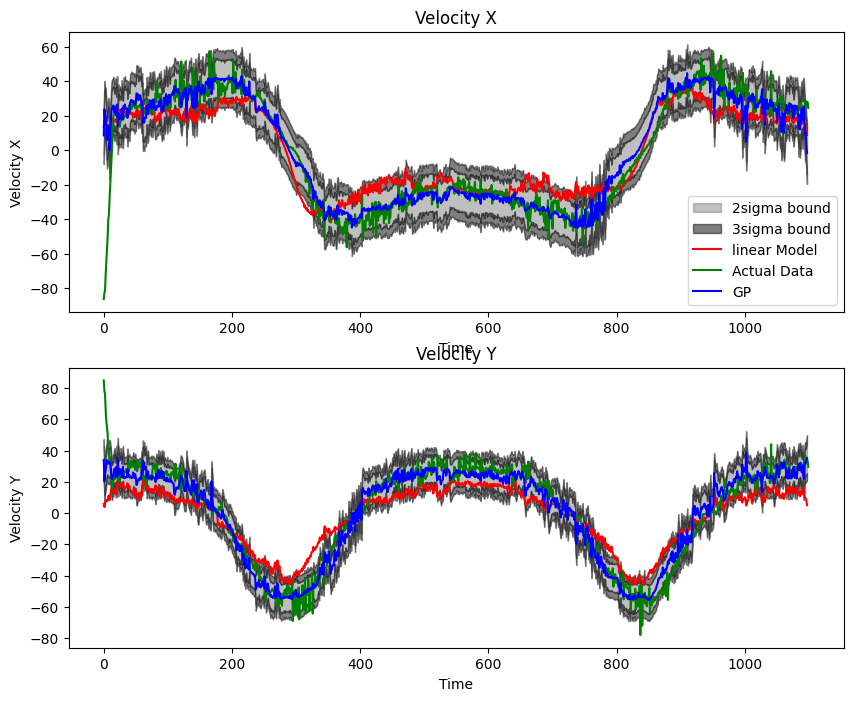

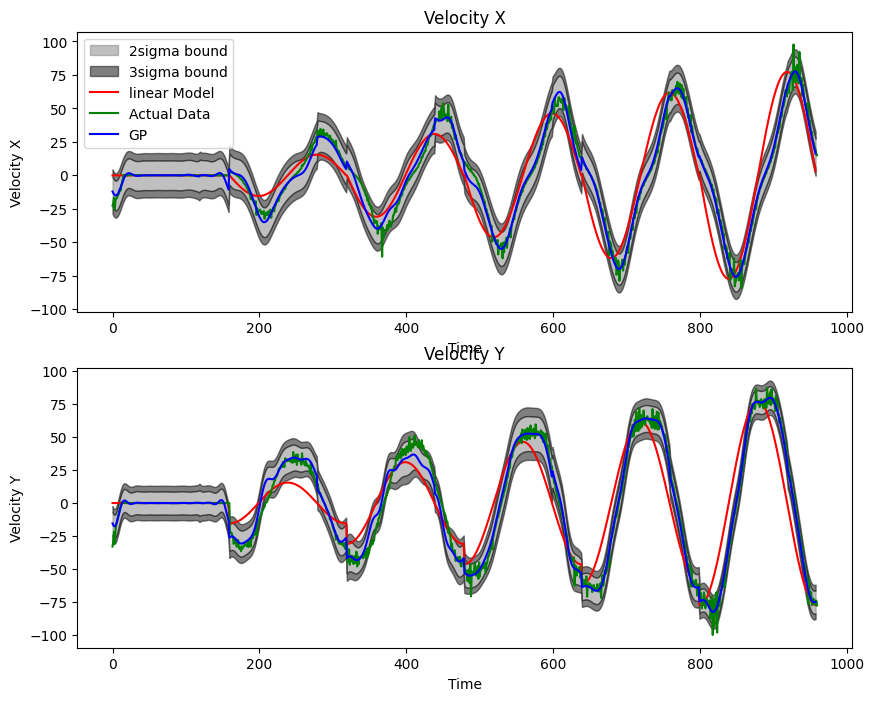

In [44]:
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

In [14]:
# GP.estimate_a0(2)
# GP.load('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\partial')

GP Learning Complete!
r^2 are 0.7326264001654177 and 0.8630021792640241


In [36]:
# model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

In [37]:
# model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())

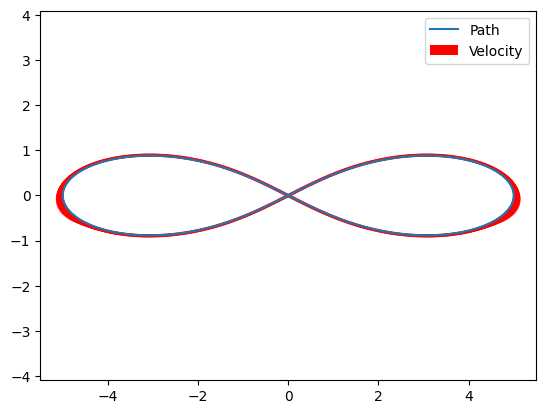

In [30]:
import numpy as np

def generate_infinity_path(self, width, height, center, num_points=1100):
    """
    Generate points for an infinity-shaped path with constant velocity and calculate velocity at each point.

    Args:
    width (float): The width of the infinity path.
    height (float): The height of the infinity path.
    center (tuple): The (x, y) center of the infinity path.
    num_points (int): Number of points to generate.

    Returns:
    np.array: Array of points (x, y) that form the infinity path.
    np.array: Array of velocities (vx, vy) at each point.
    """
    # Unpack the center coordinates
    cx, cy = center[0], center[1]
    
    # Generate t values from 0 to 2*pi
    t = np.linspace(0, 2 * np.pi, num_points)
    
    # Parametric equations for the lemniscate
    x = cx + (width / 2) * np.sin(t) / (1 + np.cos(t)**2)
    y = cy + (height / 2) * np.sin(t) * np.cos(t) / (1 + np.cos(t)**2)
    
    # Calculate cumulative distances
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    vel =2
    cumulative_distances = 1/vel*np.insert(np.cumsum(distances), 0, 0)
    
    # Generate uniform distances
    uniform_distances = np.linspace(0, cumulative_distances[-1], num_points)
    
    # Interpolate to get points at uniform distances
    x_uniform = np.interp(uniform_distances, cumulative_distances, x)
    y_uniform = np.interp(uniform_distances, cumulative_distances, y)
    
    # Calculate velocities using central difference on uniform points
    dt = uniform_distances[1] - uniform_distances[0]  # Assume uniform spacing
    vx_uniform = np.gradient(x_uniform, dt)
    vy_uniform = np.gradient(y_uniform, dt)
    
    return np.column_stack((x_uniform, y_uniform)), np.column_stack((vx_uniform, vy_uniform))

# Example usage
path_generator = type('PathGenerator', (object,), {"generate_infinity_path": generate_infinity_path})()
path, velocities = path_generator.generate_infinity_path(width=10, height=5, center=(0, 0), num_points=1100)

import matplotlib.pyplot as plt
plt.plot(path[:, 0], path[:, 1], label='Path')
plt.quiver(path[:, 0], path[:, 1], velocities[:, 0], velocities[:, 1], scale=50, color='r', label='Velocity')
plt.axis('equal')
plt.legend()
plt.show()


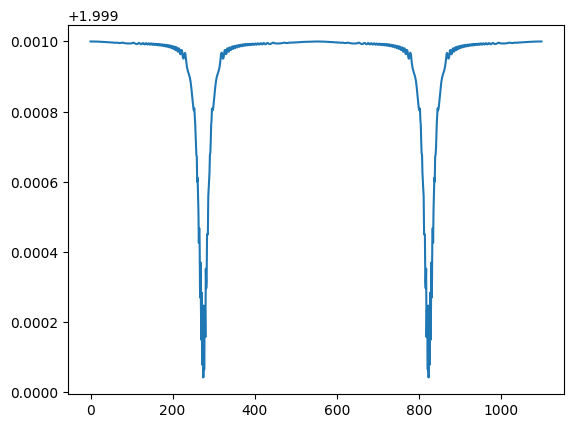

In [32]:
plt.plot(np.sqrt(velocities[:,0]**2+velocities[:,1]**2))